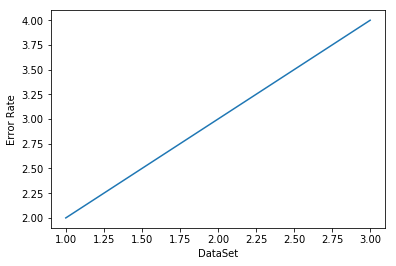

In [2]:
import matplotlib.pyplot as plt

def dummyplot():
    plt.plot([1, 2, 3], [2, 3, 4])
    plt.ylabel('Error Rate')
    plt.xlabel('DataSet')
    plt.show()

dummyplot()


## Training Perceptron Model
